# Lock-in Feedback algorithm (LiF)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Explanation" data-toc-modified-id="Explanation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explanation</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Illustrative-Example" data-toc-modified-id="Illustrative-Example-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Illustrative Example</a></span><ul class="toc-item"><li><span><a href="#Simple-function" data-toc-modified-id="Simple-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple function</a></span></li><li><span><a href="#Oscillations" data-toc-modified-id="Oscillations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Oscillations</a></span></li><li><span><a href="#Batch-Learning" data-toc-modified-id="Batch-Learning-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Batch Learning</a></span></li></ul></li><li><span><a href="#Dichotomous-functions" data-toc-modified-id="Dichotomous-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dichotomous functions</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Optima-Example" data-toc-modified-id="Optima-Example-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Optima Example</a></span></li></ul></li><li><span><a href="#Non-stationary-Optima-(concept-drift)" data-toc-modified-id="Non-stationary-Optima-(concept-drift)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Non-stationary Optima (concept drift)</a></span><ul class="toc-item"><li><span><a href="#Non-stationary-Optima-in-dichotomous-functions" data-toc-modified-id="Non-stationary-Optima-in-dichotomous-functions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Non-stationary Optima in dichotomous functions</a></span></li></ul></li><li><span><a href="#Caveats" data-toc-modified-id="Caveats-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Caveats</a></span><ul class="toc-item"><li><span><a href="#Local-Optima" data-toc-modified-id="Local-Optima-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Local Optima</a></span></li><li><span><a href="#Other-downsides" data-toc-modified-id="Other-downsides-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Other downsides</a></span></li></ul></li></ul></div>

## Introduction

### Explanation

**What is a lock in feedback algorithm?**<br>
A LiF algorithm is a noise and concept-drift (non-stationary) resistent stochastic optimization method for sequential experiments.
<br>

**What are its properties?**<br>
* adapts to changing optima (concept drift)
* resistent to high degree of noise
* designs experiments to gain maximal information (adaptive design optimization) 
* Receives bandit feedback (limited to the actions taken by the system) and decides what to ask/survey next - e.g. finding optimal prices through revenue signals in E-Tailer commerce
<br>

**What parameters have to be set manually?**<br>
* Initial value $x0$
* Amplitude $A$
* Batch period length $T$
* Learning rate $\gamma$

**How does the algorithm work?**<br>
Discrete oscillations around a central value x0 as input for the experiments, observing the response y. If y in phase with oscillations around x increase xt, out of phase decrease xt

**What does it look like in discrete form?**<br>
* **Update**: x0 in batches to average out noise after every T responses to surveyed values (xt’s hovering around x)
* **Oscillations**: $O = A*cos(w*t)$ where $w=2pi/T$, $t$ is a running parameter $1,2…,T, A:=$amplitude
* **Slope**: direction/distance weighted average of T tested xt values (weight=cos(wt)=O)

**Examples**

* **Oscillation values** := O = 2 * [0.5, -0.5, -1.0, -0.5, 0.5, 1.0] (for T = 6, A=2)<br>
* **Responses**:= $y_t = $ [2, 0.5, 0.2, 0.3, 1.0, 2.0] <br>
* **Score** = weighted average = (0.5 * 2 - 0.5 * 0.5 - 1 * 0.2 - 0.5 * 0.3 + 1 * 2)/T = 2.4/6 = 0.4 <br>

**Results**
* Estimated slope positive (higher response if input variable increases)
* Input and response in phase (both input and response change in the same direction)
 
$x_{max}$ to the right of the current central value $x_0$<br>

### Imports
Import libraries and write settings here.

In [1207]:
# Data manipulation
from scipy.stats import bernoulli
from IPython.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

## Illustrative Example

### Simple function

In [1251]:
def simple(x, e=1.0):
    """A parabolic function with a maximum at x=6"""
    y = -0.3 * (x-6)**2 + 5 + np.random.normal(0.0, e)
    return y

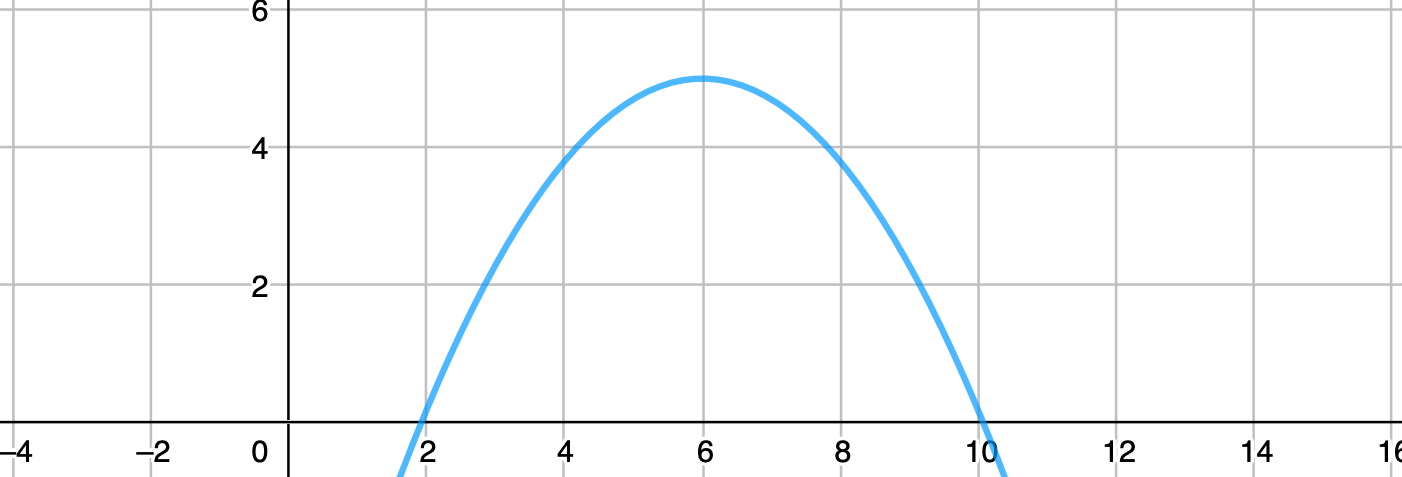

In [1253]:
Image("Images/Stationary.png")

Expected maximum at  $x_{max} = 6$

### Oscillations

In [1247]:
T = 6
print([round(math.cos(2*math.pi/T*t), 2) for t in range(T)])
O = np.array([round(math.cos(2*math.pi/T*t), 2) for t in range(T)])

[1.0, 0.5, -0.5, -1.0, -0.5, 0.5]


### Batch Learning

In [1248]:
def batch_continous(rep=100, A=1, g=0.1, e=1):
    x0 = [0.0]
    x_log = [x0[0]]
    for i in range(rep):
        surveys = [simple(xt, e) for xt in x0[-1] + A*O]
        directiondistance = surveys * O
        avg = np.sum(directiondistance)/T
        x0 = x0 + g*avg
        x_log.append(x0)
    return x_log

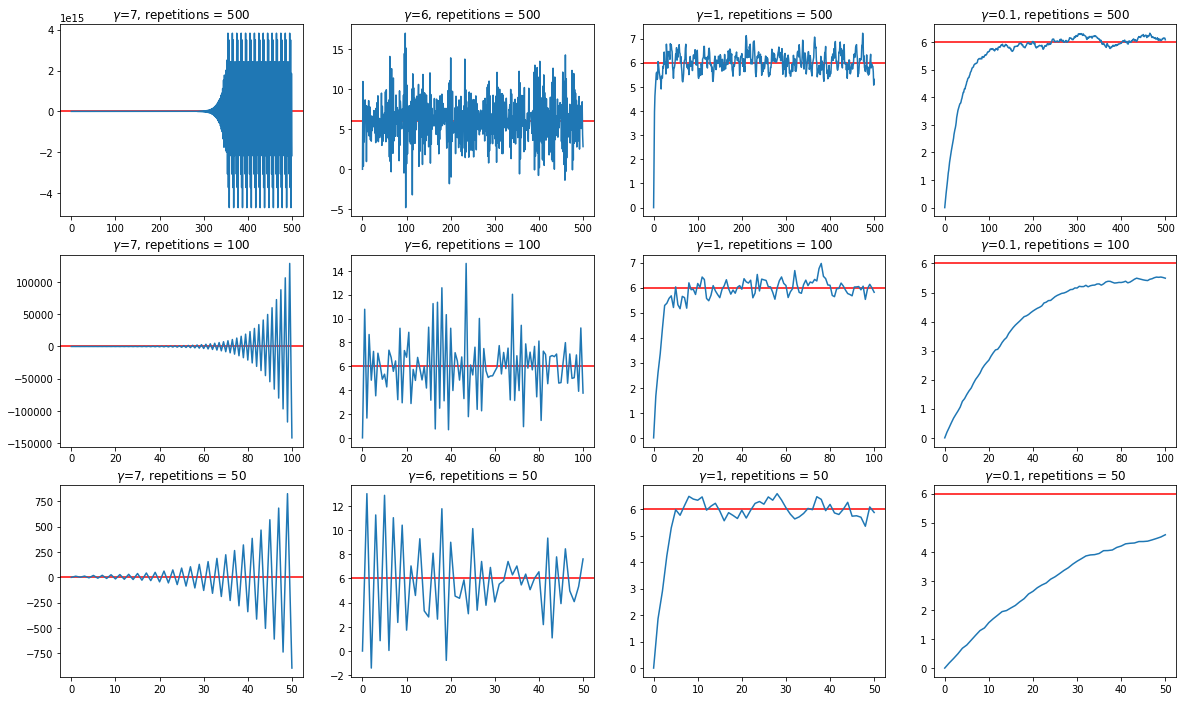

In [1250]:
a1 = batch_continous(rep=500, g=7)
a2 = batch_continous(rep=500, g=6)
a3 = batch_continous(rep=500, g=1)
a4 = batch_continous(rep=500, g=0.1)

a5 = batch_continous(rep=100, g=7)
a6 = batch_continous(rep=100, g=6)
a7 = batch_continous(rep=100, g=1)
a8 = batch_continous(rep=100, g=0.1)

a9 = batch_continous(rep=50, g=7)
a10 = batch_continous(rep=50, g=6)
a11 = batch_continous(rep=50, g=1)
a12 = batch_continous(rep=50, g=0.1)

fig, a = plt.subplots(3, 4, figsize=(20, 12))
a[0][0].axhline(6, color="r")
a[0][0].plot(range(len(a1)), a1)
a[0][0].set_title('$\gamma$=7, repetitions = 500')

a[0][1].axhline(6, color="r")
a[0][1].plot(range(len(a2)), a2)
a[0][1].set_title('$\gamma$=6, repetitions = 500')

a[0][2].axhline(6, color="r")
a[0][2].plot(range(len(a3)), a3)
a[0][2].set_title('$\gamma$=1, repetitions = 500')

a[0][3].axhline(6, color="r")
a[0][3].plot(range(len(a4)), a4)
a[0][3].set_title('$\gamma$=0.1, repetitions = 500')

a[1][0].axhline(6, color="r")
a[1][0].plot(range(len(a5)), a5)
a[1][0].set_title('$\gamma$=7, repetitions = 100')

a[1][1].axhline(6, color="r")
a[1][1].plot(range(len(a6)), a6)
a[1][1].set_title('$\gamma$=6, repetitions = 100')

a[1][2].axhline(6, color="r")
a[1][2].plot(range(len(a7)), a7)
a[1][2].set_title('$\gamma$=1, repetitions = 100')

a[1][3].axhline(6, color="r")
a[1][3].plot(range(len(a8)), a8)
a[1][3].set_title('$\gamma$=0.1, repetitions = 100')

a[2][0].axhline(6, color="r")
a[2][0].plot(range(len(a9)), a9)
a[2][0].set_title('$\gamma$=7, repetitions = 50')

a[2][1].axhline(6, color="r")
a[2][1].plot(range(len(a10)), a10)
a[2][1].set_title('$\gamma$=6, repetitions = 50')

a[2][2].axhline(6, color="r")
a[2][2].plot(range(len(a11)), a11)
a[2][2].set_title('$\gamma$=1, repetitions = 50')

a[2][3].axhline(6, color="r")
a[2][3].plot(range(len(a12)), a12)
a[2][3].set_title('$\gamma$=0.1, repetitions = 50')

plt.show();

## Dichotomous functions 

### Introduction

In real-life signals and responses are often dichotomous (binary) such as with purchase decisions. Either a purchase is made or its not.

$y \in \{1,0\}$

### Optima Example

The choice depends on the price $x_t$ and underlies noise through a bernoulli distribution. 

$y_t \sim Bernoulli ( p = \frac{1}{ 1+e^{-10+x_t}} )$

The goal is to find the price x that maximizes the revenue r

$ argmax_{x_t} E[r] = argmax_{x_t} y_t*x_t = argmax_{x_t} Bernoulli ( p = \frac{1}{ 1+e^{-10+x_t}} ) * x_t$

In [1214]:
def dichotomous(x):
    """Function with a binary response"""
    return np.sum(bernoulli.rvs(p=1/(1+math.e**(-10+x))))*x

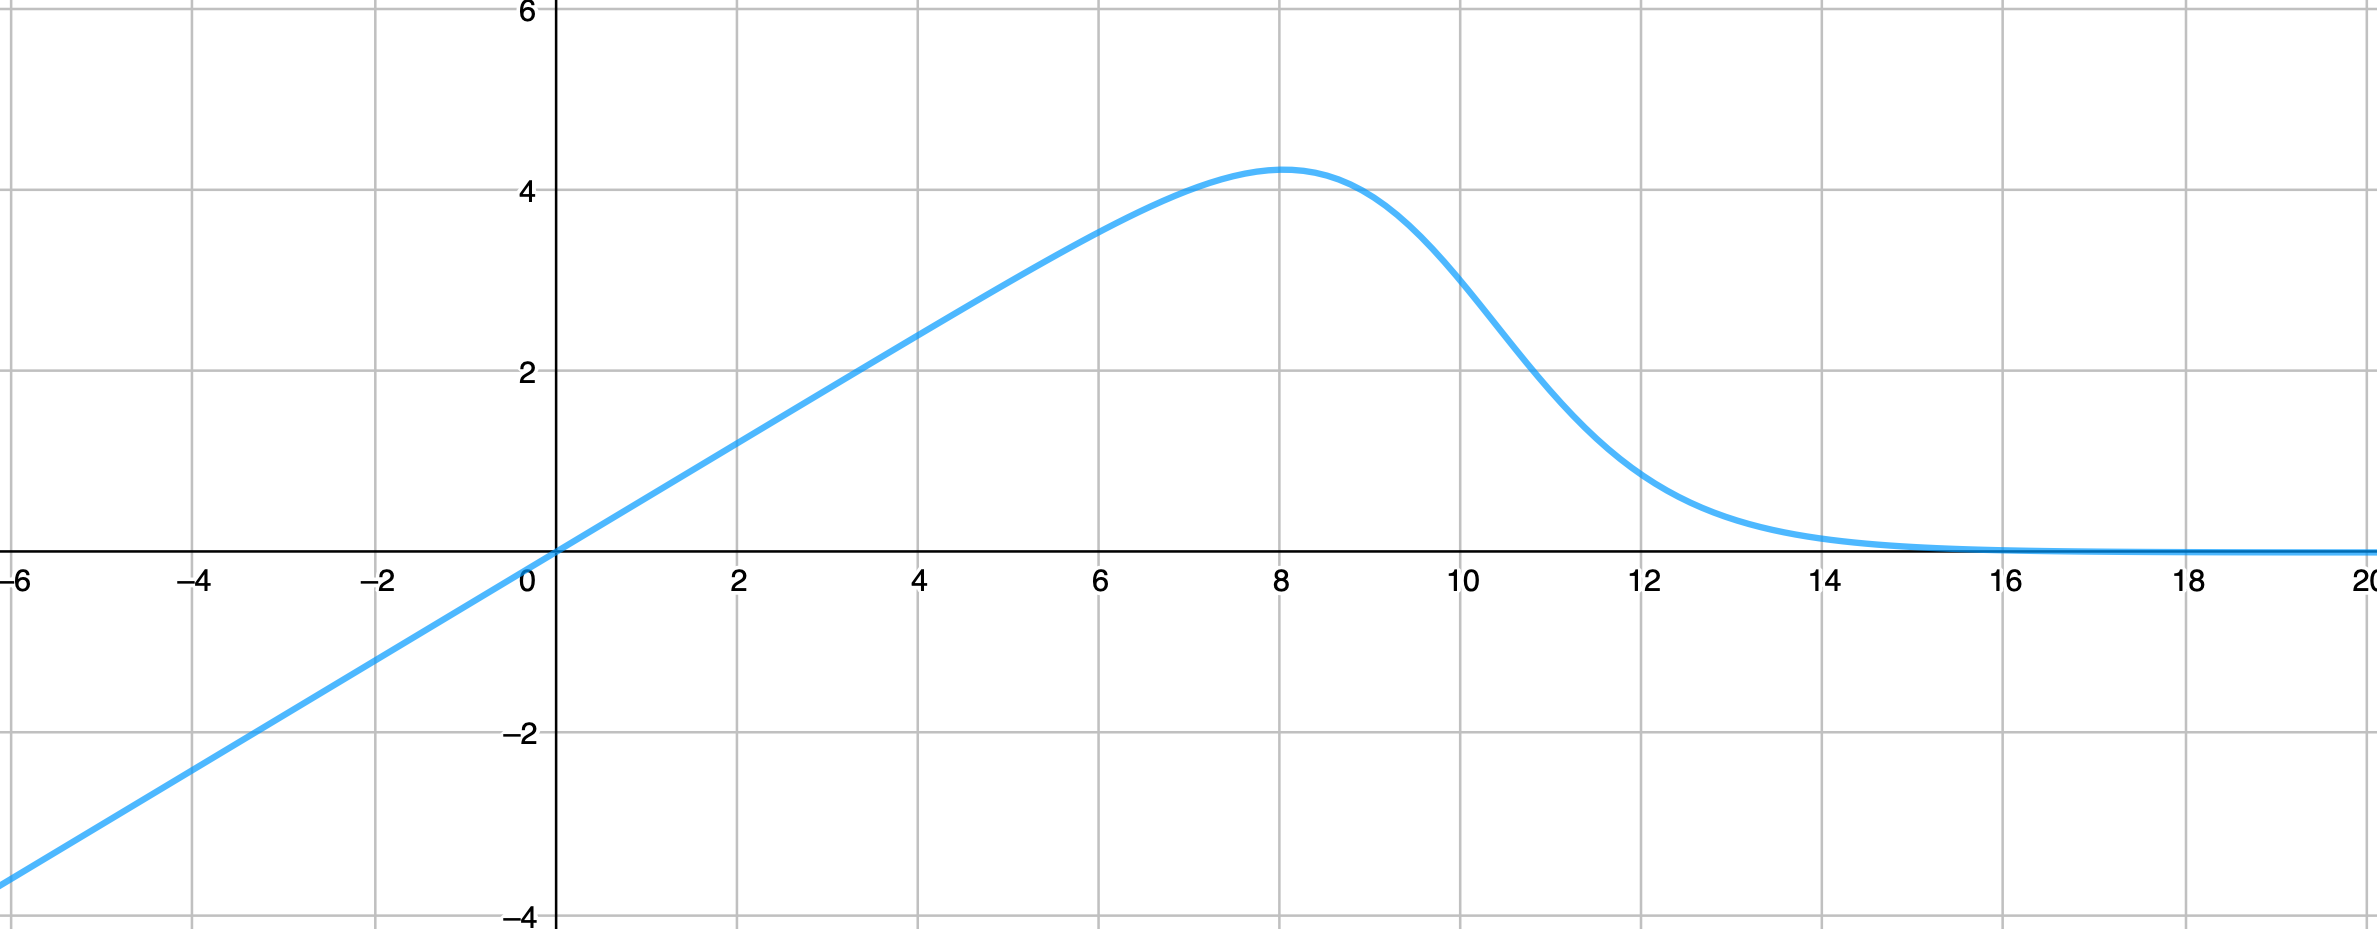

In [1254]:
Image("Images/DichotomousSmoothed.png")

Expected maximal initial revenue at about $x_{max} = 8$

In [1216]:
def batch_dichotomous(rep=100, A=1, g=0.1, e=1):
    x0 = [0.0]
    x_log = [x0[0]]
    for i in range(rep):
        surveys = [dichotomous(xt) for xt in x0[-1] + A*O]
        directiondistance = surveys * O
        avg = np.sum(directiondistance)/T
        x0 = x0 + g*avg
        x_log.append(x0[0])
    return x_log

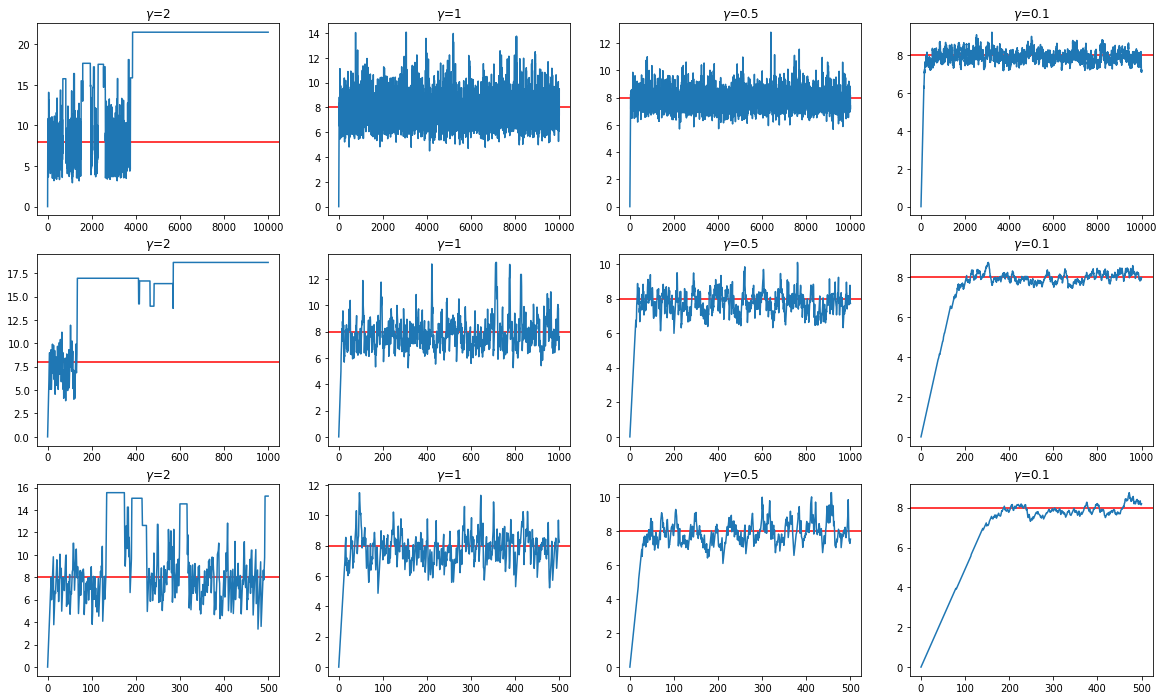

In [1241]:
b1 = batch_dichotomous(rep=10000, g=2)
b2 = batch_dichotomous(rep=10000, g=1)
b3 = batch_dichotomous(rep=10000, g=0.5)
b4 = batch_dichotomous(rep=10000, g=0.1)

b5 = batch_dichotomous(rep=1000, g=2)
b6 = batch_dichotomous(rep=1000, g=1)
b7 = batch_dichotomous(rep=1000, g=0.5)
b8 = batch_dichotomous(rep=1000, g=0.1)

b9 = batch_dichotomous(rep=500, g=2)
b10 = batch_dichotomous(rep=500, g=1)
b11 = batch_dichotomous(rep=500, g=0.5)
b12 = batch_dichotomous(rep=500, g=0.1)

fig, b = plt.subplots(3, 4, figsize=(20, 12))
b[0][0].axhline(8, color="r")
b[0][0].plot(range(len(b1)), b1)
b[0][0].set_title('$\gamma$=2')

b[0][1].axhline(8, color="r")
b[0][1].plot(range(len(b2)), b2)
b[0][1].set_title('$\gamma$=1')

b[0][2].axhline(8, color="r")
b[0][2].plot(range(len(b3)), b3)
b[0][2].set_title('$\gamma$=0.5')

b[0][3].axhline(8, color="r")
b[0][3].plot(range(len(b4)), b4)
b[0][3].set_title('$\gamma$=0.1')

b[1][0].axhline(8, color="r")
b[1][0].plot(range(len(b5)), b5)
b[1][0].set_title('$\gamma$=2')

b[1][1].axhline(8, color="r")
b[1][1].plot(range(len(b6)), b6)
b[1][1].set_title('$\gamma$=1')

b[1][2].axhline(8, color="r")
b[1][2].plot(range(len(b7)), b7)
b[1][2].set_title('$\gamma$=0.5')

b[1][3].axhline(8, color="r")
b[1][3].plot(range(len(b8)), b8)
b[1][3].set_title('$\gamma$=0.1')

b[2][0].axhline(8, color="r")
b[2][0].plot(range(len(b9)), b9)
b[2][0].set_title('$\gamma$=2')

b[2][1].axhline(8, color="r")
b[2][1].plot(range(len(b10)), b10)
b[2][1].set_title('$\gamma$=1')

b[2][2].axhline(8, color="r")
b[2][2].plot(range(len(b11)), b11)
b[2][2].set_title('$\gamma$=0.5')

b[2][3].axhline(8, color="r")
b[2][3].plot(range(len(b12)), b12)
b[2][3].set_title('$\gamma$=0.1')

plt.show()

## Non-stationary Optima (concept drift)

### Non-stationary Optima in dichotomous functions

In the real world, there must not be a single fixed optimum. Optima can be **non-stationary**. This is also known as concept-drift.

In [1218]:
def drift(x, t):
    """A non-stationary function with optima shifting from 8 to 17.21"""
    f = 750
    to = 1250
    if t < f:
        return np.sum(bernoulli.rvs(p=1/(1+math.e**(-10+x))))*x
    elif f <= t <= to:
        lin = (t-f)/(to-f)*10
        return np.sum(bernoulli.rvs(p=1/(1+math.e**(-10+x-lin))))*x
    elif t > to:
        return np.sum(bernoulli.rvs(p=1/(1+math.e**(-20+x))))*x

In [1204]:
def batch_drift(rep=2000, A=1, g=0.1, e=1):
    x0 = [14.0]
    x_log = [x0[0]]
    for i in range(rep):
        surveys = [drift(xt, i) for xt in x0[-1] + A*O]
        directiondistance = surveys * O
        avg = np.sum(directiondistance)/T
        x0 = x0 + g*avg
        x_log.append(x0[0])
    return x_log

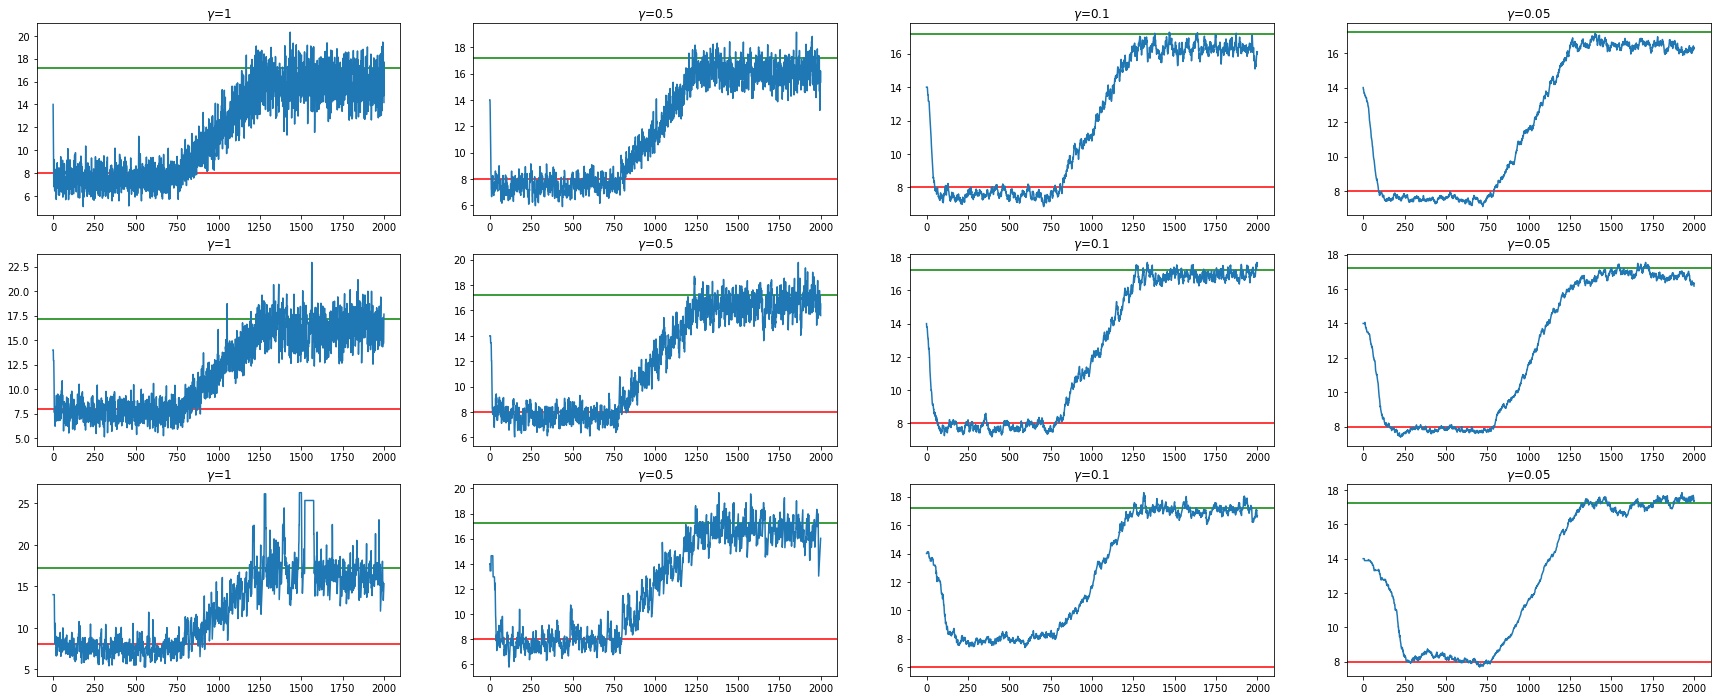

In [1205]:
d1 = batch_drift(g=1, A=3)
d2 = batch_drift(g=0.5, A=3)
d3 = batch_drift(g=0.1, A=3)
d4 = batch_drift(g=0.05, A=3)

d5 = batch_drift(g=1, A=2)
d6 = batch_drift(g=0.5, A=2)
d7 = batch_drift(g=0.1, A=2)
d8 = batch_drift(g=0.05, A=2)

d9 = batch_drift(g=1, A=1)
d10 = batch_drift(g=0.5, A=1)
d11 = batch_drift(g=0.1, A=1)
d12 = batch_drift(g=0.05, A=1)

fig, d = plt.subplots(3, 4, figsize=(30, 12))

d[0][0].axhline(8, color="r")
d[0][0].axhline(17.21, color="g")
d[0][0].plot(range(len(d1)), d1)
d[0][0].set_title('$\gamma$=1')

d[0][1].axhline(17.21, color="g")
d[0][1].axhline(8, color="r")
d[0][1].plot(range(len(d2)), d2)
d[0][1].set_title('$\gamma$=0.5')

d[0][2].axhline(17.21, color="g")
d[0][2].axhline(8, color="r")
d[0][2].plot(range(len(d3)), d3)
d[0][2].set_title('$\gamma$=0.1')

d[0][3].axhline(17.21, color="g")
d[0][3].axhline(8, color="r")
d[0][3].plot(range(len(d4)), d4)
d[0][3].set_title('$\gamma$=0.05')

d[1][0].axhline(17.21, color="g")
d[1][0].axhline(8, color="r")
d[1][0].plot(range(len(d5)), d5)
d[1][0].set_title('$\gamma$=1')

d[1][1].axhline(17.21, color="g")
d[1][1].axhline(8, color="r")
d[1][1].plot(range(len(d6)), d6)
d[1][1].set_title('$\gamma$=0.5')

d[1][2].axhline(17.21, color="g")
d[1][2].axhline(8, color="r")
d[1][2].plot(range(len(d7)), d7)
d[1][2].set_title('$\gamma$=0.1')

d[1][3].axhline(17.21, color="g")
d[1][3].axhline(8, color="r")
d[1][3].plot(range(len(d8)), d8)
d[1][3].set_title('$\gamma$=0.05')

d[2][0].axhline(17.21, color="g")
d[2][0].axhline(8, color="r")
d[2][0].plot(range(len(d9)), d9)
d[2][0].set_title('$\gamma$=1')

d[2][1].axhline(17.21, color="g")
d[2][1].axhline(8, color="r")
d[2][1].plot(range(len(d10)), d10)
d[2][1].set_title('$\gamma$=0.5')

d[2][2].axhline(17.21, color="g")
d[2][2].axhline(6, color="r")
d[2][2].plot(range(len(d11)), d11)
d[2][2].set_title('$\gamma$=0.1')

d[2][3].axhline(17.21, color="g")
d[2][3].axhline(8, color="r")
d[2][3].plot(range(len(d12)), d12)
d[2][3].set_title('$\gamma$=0.05')

plt.show()

## Caveats

### Local Optima

In gradient-estimation stochastic optimization reaching **global optima is not guaranteed**.

In [968]:
def local(x, e=1):
    return 0.1*x**3+3*math.cos(1.5*x) + np.random.normal(0.0, e)

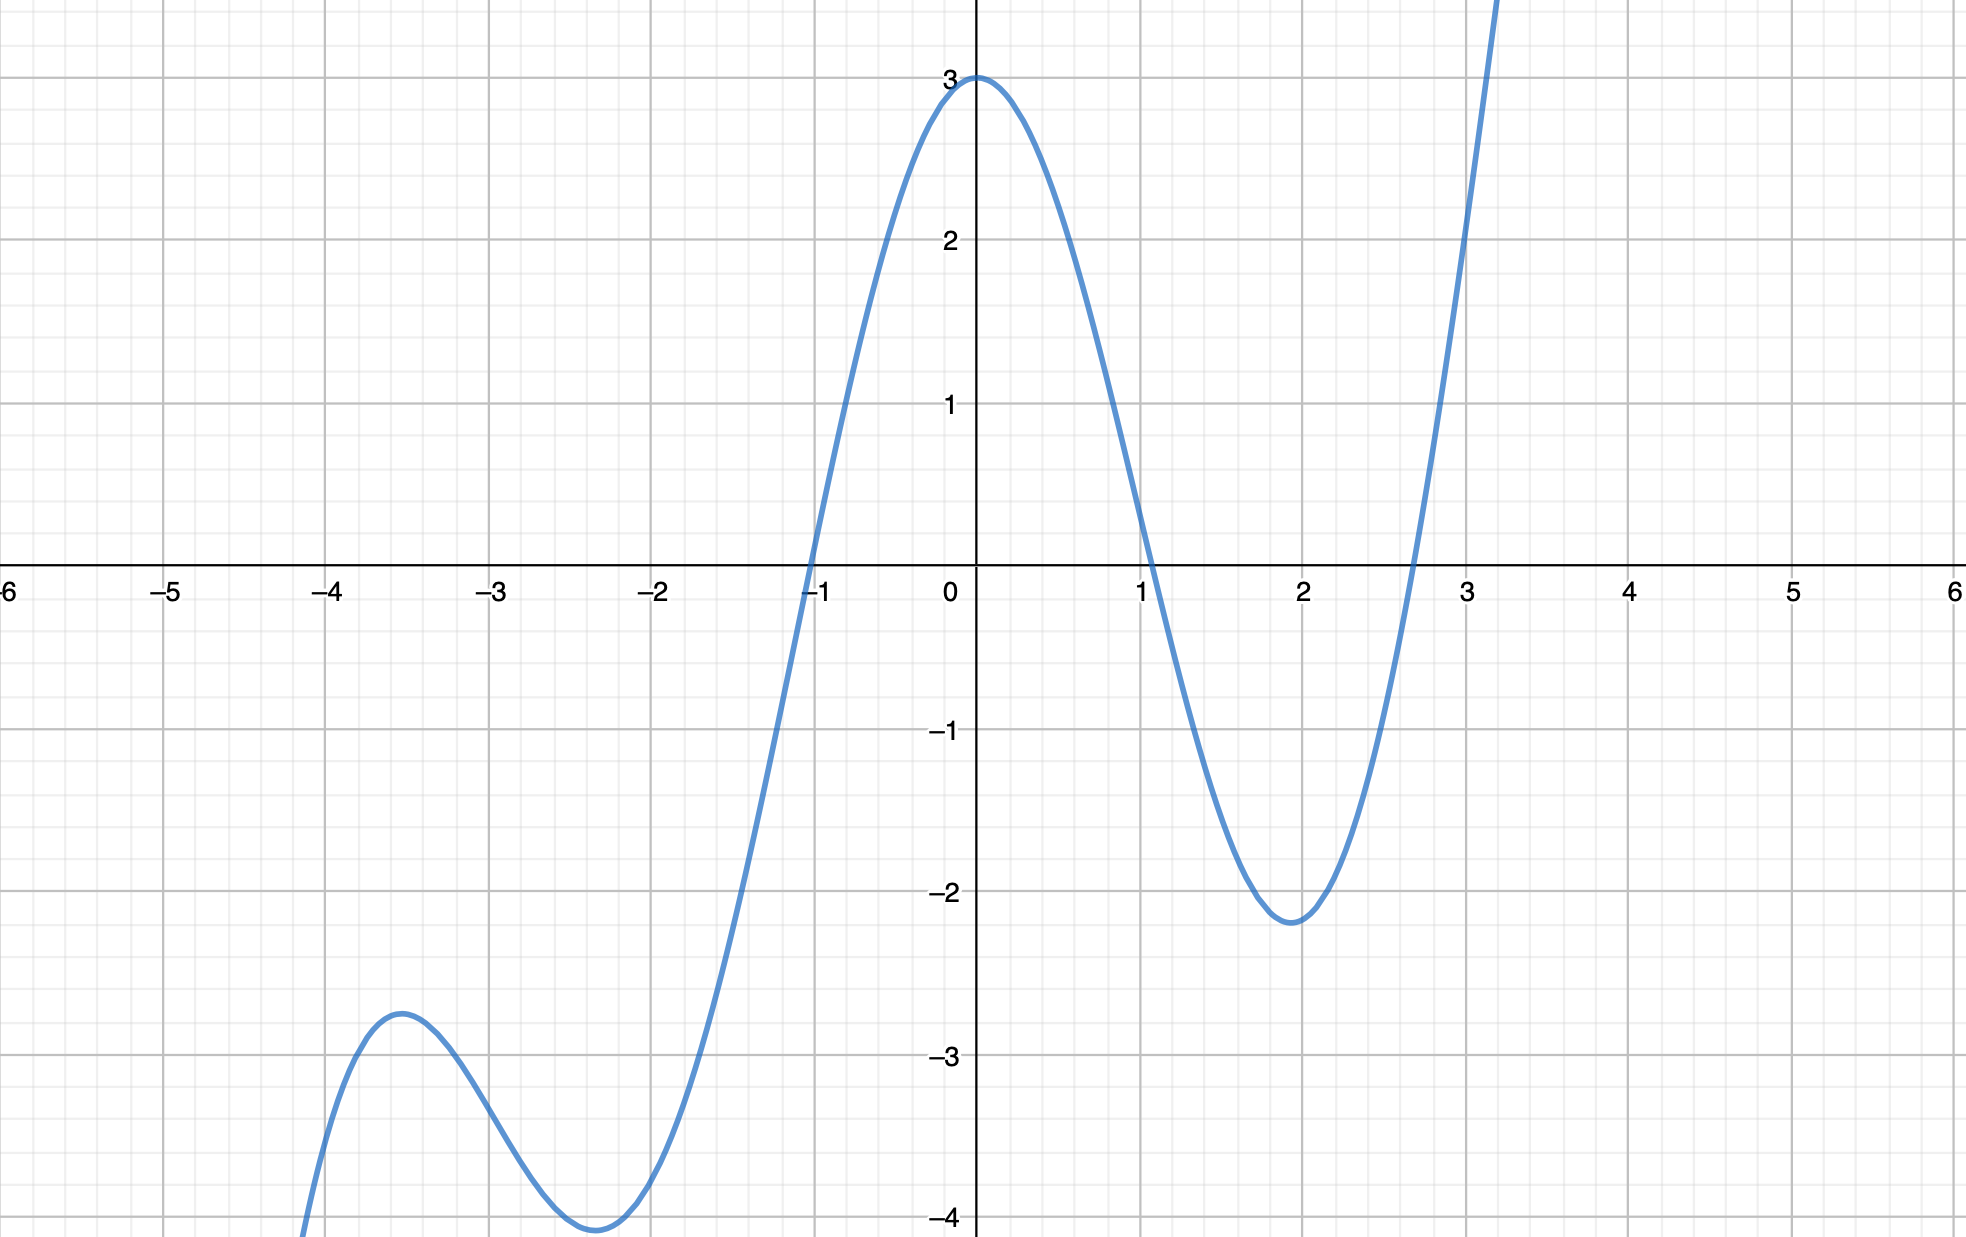

In [1255]:
Image("Images/LocalOptima.png")

There are two local optimas visible. If the amplitude is smaller than the width of the trough the LiF algorithm gets stuck at the local optima.

In [982]:
def batch_local(x=0, rep=500, A=1, g=0.01, e=1):
    x0 = [x]
    x_log = [x0[0]]
    for i in range(rep):
        surveys = [local(xt, e) for xt in x0[-1] + A*O]
        directiondistance = surveys * O
        avg = np.sum(directiondistance)/T
        x0 = x0 + g*avg
        x_log.append(x0[0])
    return x_log

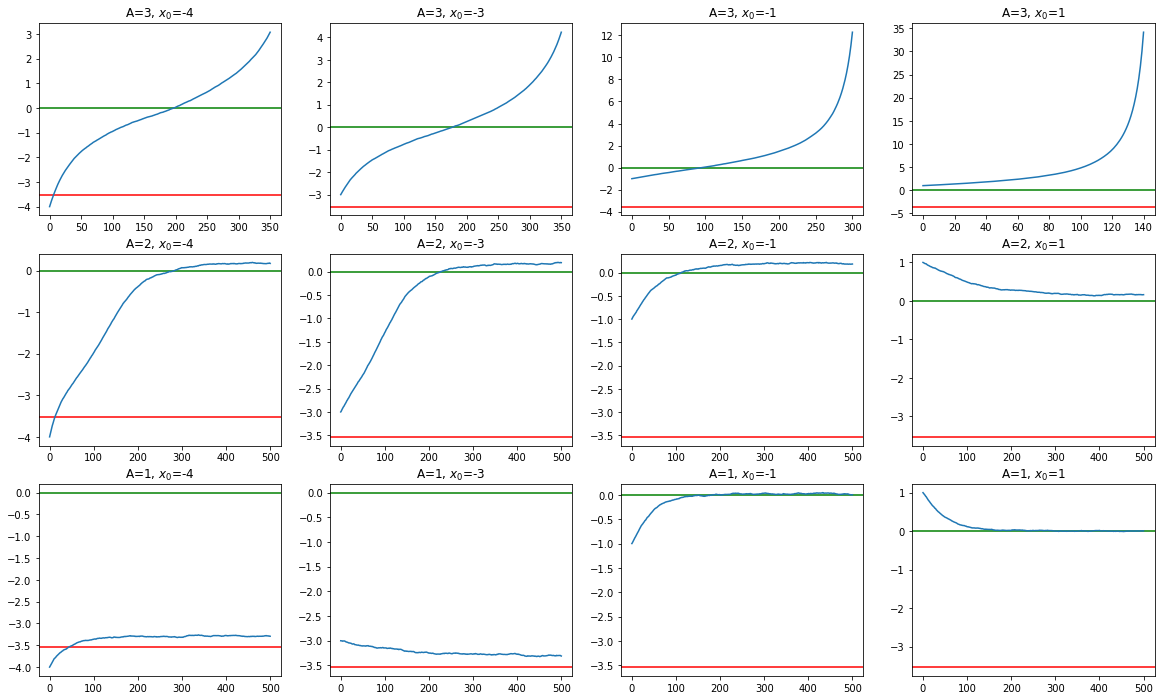

In [1010]:
c1 = batch_local(A=3, x=-4, rep=350)
c2 = batch_local(A=3, x=-3, rep=350)
c3 = batch_local(A=3, x=-1, rep=300)
c4 = batch_local(A=3, x=1, rep=140)

c5 = batch_local(A=2, x=-4)
c6 = batch_local(A=2, x=-3)
c7 = batch_local(A=2, x=-1)
c8 = batch_local(A=2, x=1)

c9 = batch_local(A=1, x=-4)
c10 = batch_local(A=1, x=-3)
c11 = batch_local(A=1, x=-1)
c12 = batch_local(A=1, x=1)

fig, c = plt.subplots(3, 4, figsize=(20, 12))

c[0][0].axhline(0, color="g")
c[0][0].axhline(-3.5333, color="r")
c[0][0].plot(range(len(c1)), c1)
c[0][0].set_title('A=3, $x_0$=-4')

c[0][1].axhline(-3.5333, color="r")
c[0][1].axhline(0, color="g")
c[0][1].plot(range(len(c2)), c2)
c[0][1].set_title('A=3, $x_0$=-3')

c[0][2].axhline(-3.5333, color="r")
c[0][2].axhline(0, color="g")
c[0][2].plot(range(len(c3)), c3)
c[0][2].set_title('A=3, $x_0$=-1')

c[0][3].axhline(-3.5333, color="r")
c[0][3].axhline(0, color="g")
c[0][3].plot(range(len(c4)), c4)
c[0][3].set_title('A=3, $x_0$=1')

c[1][0].axhline(-3.5333, color="r")
c[1][0].axhline(0, color="g")
c[1][0].plot(range(len(c5)), c5)
c[1][0].set_title('A=2, $x_0$=-4')

c[1][1].axhline(-3.5333, color="r")
c[1][1].axhline(0, color="g")
c[1][1].plot(range(len(c6)), c6)
c[1][1].set_title('A=2, $x_0$=-3')

c[1][2].axhline(-3.5333, color="r")
c[1][2].axhline(0, color="g")
c[1][2].plot(range(len(c7)), c7)
c[1][2].set_title('A=2, $x_0$=-1')

c[1][3].axhline(-3.5333, color="r")
c[1][3].axhline(0, color="g")
c[1][3].plot(range(len(c8)), c8)
c[1][3].set_title('A=2, $x_0$=1')

c[2][0].axhline(-3.5333, color="r")
c[2][0].axhline(0, color="g")
c[2][0].plot(range(len(c9)), c9)
c[2][0].set_title('A=1, $x_0$=-4')

c[2][1].axhline(-3.5333, color="r")
c[2][1].axhline(0, color="g")
c[2][1].plot(range(len(c10)), c10)
c[2][1].set_title('A=1, $x_0$=-3')

c[2][2].axhline(-3.5333, color="r")
c[2][2].axhline(0, color="g")
c[2][2].plot(range(len(c11)), c11)
c[2][2].set_title('A=1, $x_0$=-1')

c[2][3].axhline(-3.5333, color="r")
c[2][3].axhline(0, color="g")
c[2][3].plot(range(len(c12)), c12)
c[2][3].set_title('A=1, $x_0$=1')
plt.show()

### Other downsides

* The LiF algorithm only works on **well-behaved** functions which have a **single maximum**.
* It suffers from **parameter initialization** problems.

Gemerally the following parameters have performed well:
* $\gamma$ = 0.1
* A = 1
* T = 100
* $x_0$ set close to maximum